In [111]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation, FFMpegWriter  
import datetime
from itertools import product

cur_year = 0
df = None
path = f'../../../siads591 data/debris_all_for_gabbard/' # path to the data file


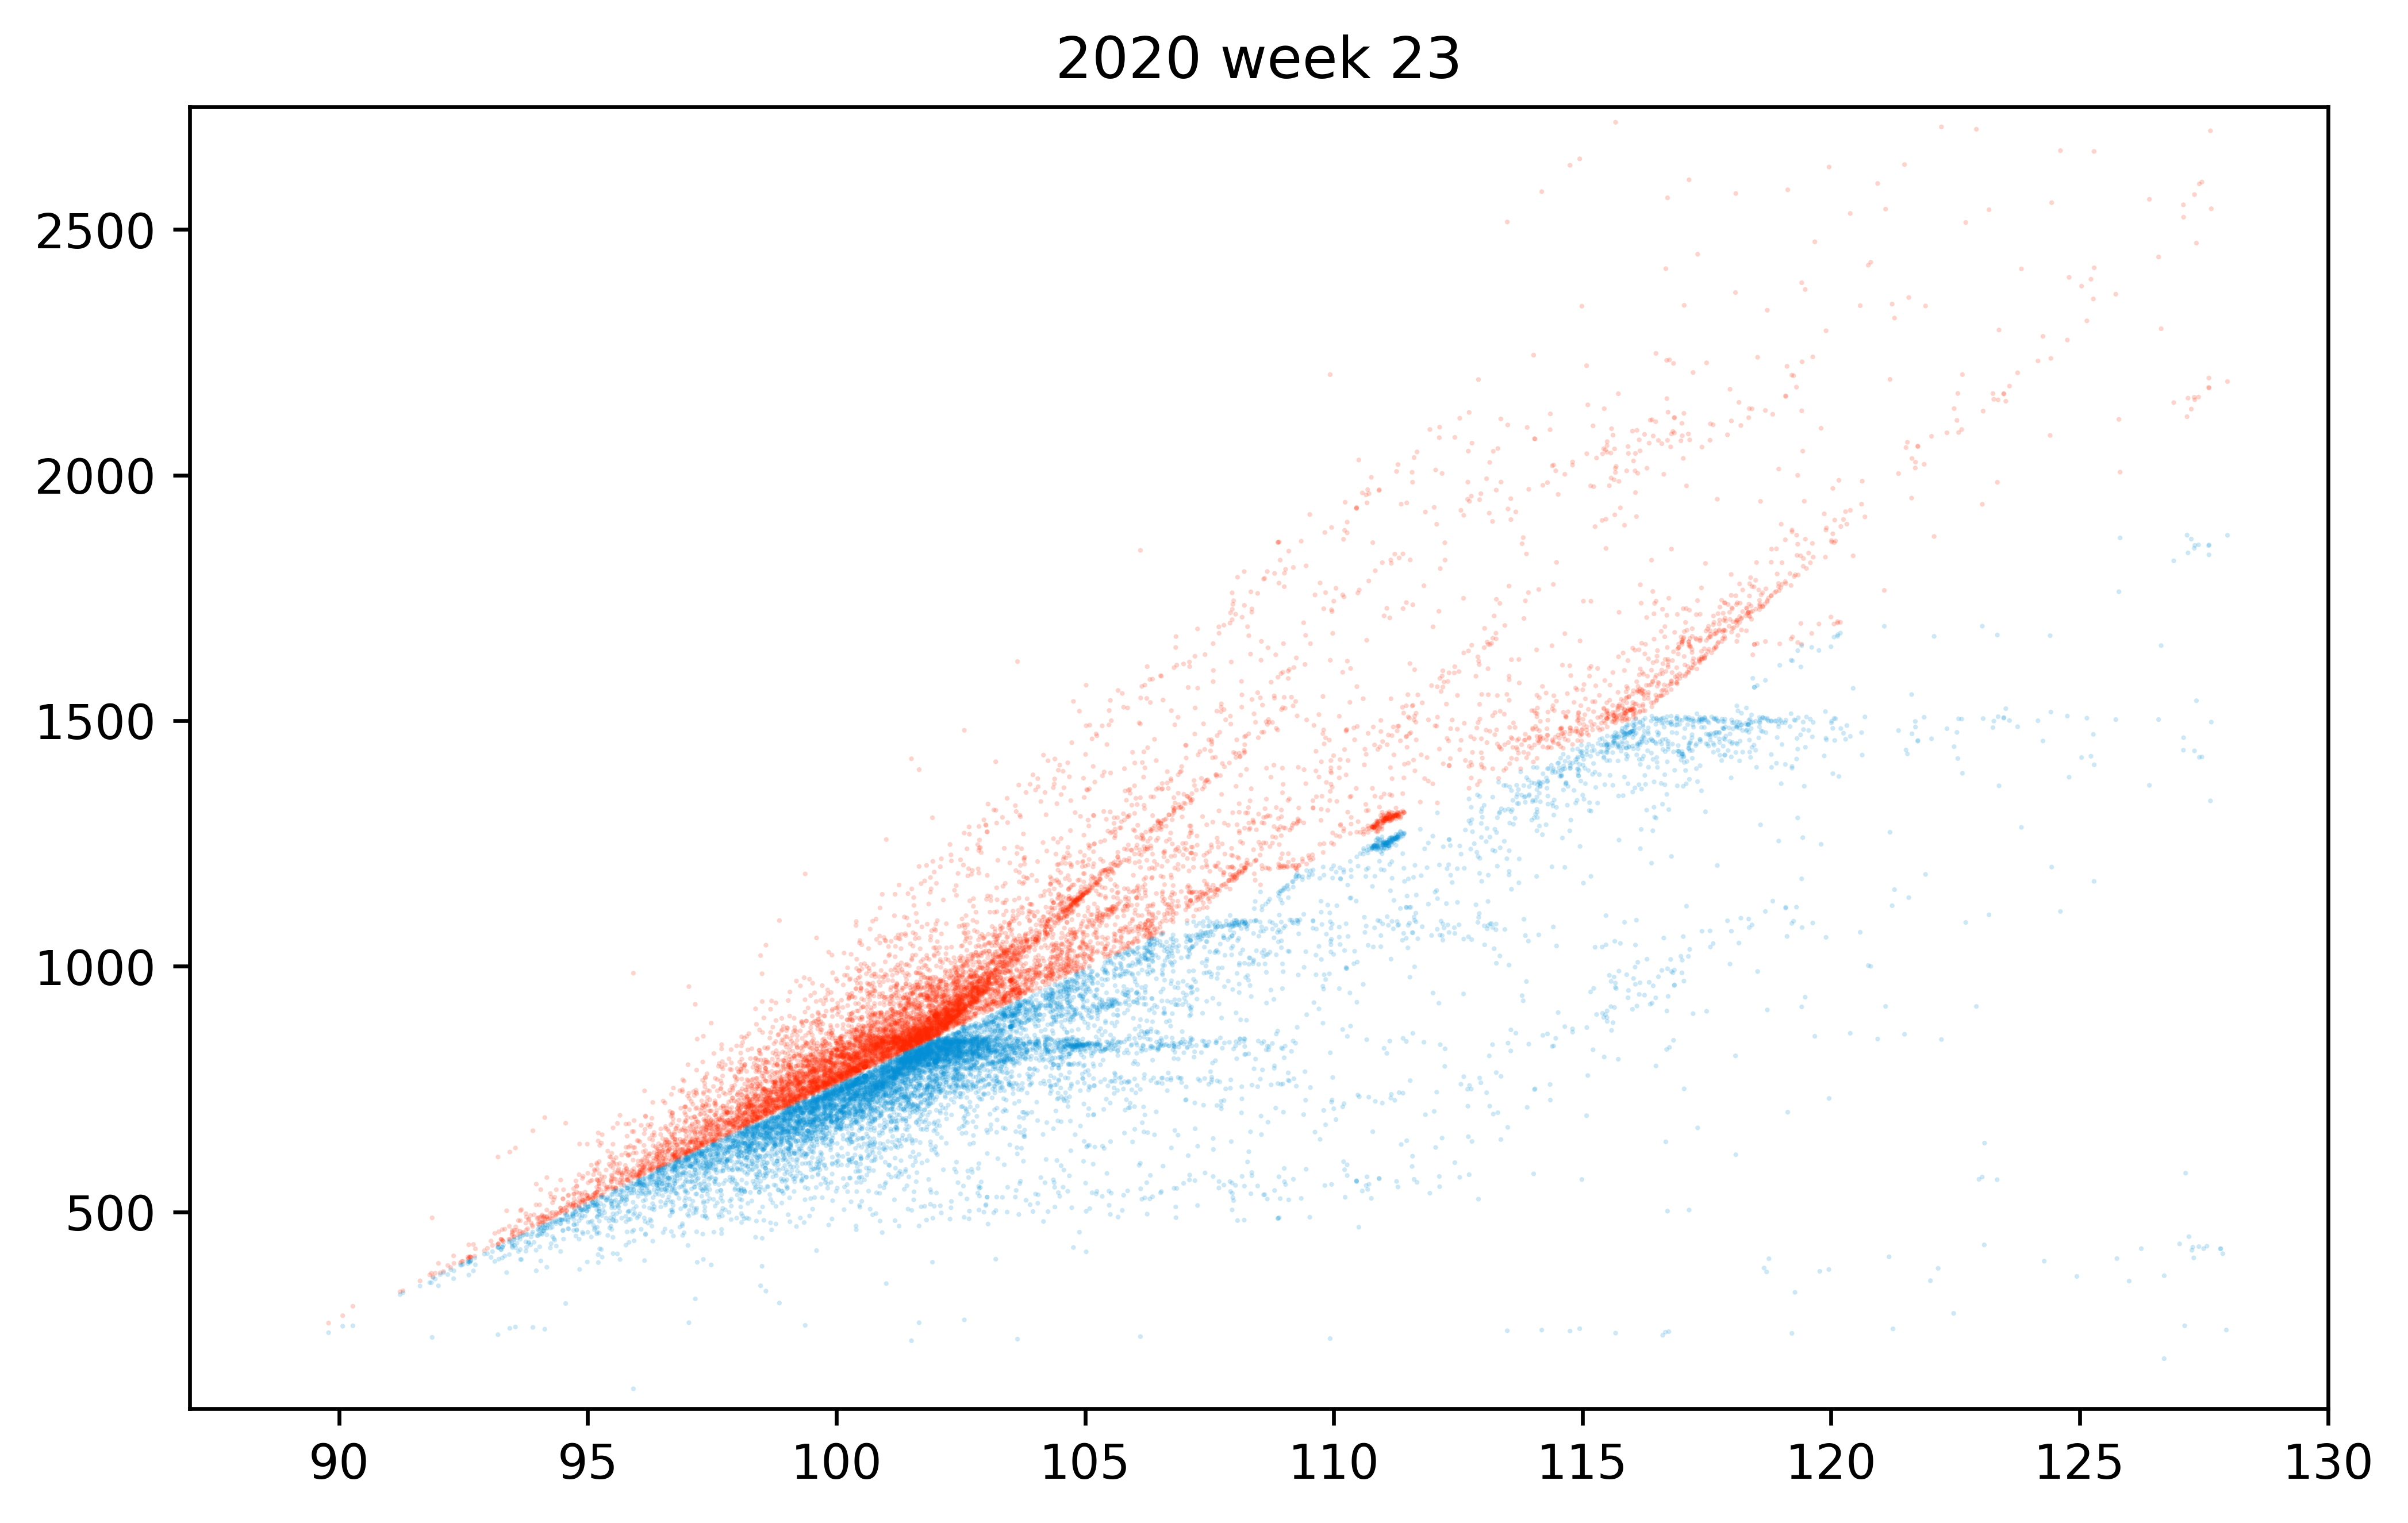

In [151]:
weeks = list(product(list(range(1975,2022)), list(range(1,53))))[:-49]
# weeks = list(product(list(range(1960,2022)), list(range(1,53))))

fig, ax = plt.subplots(dpi=600, figsize=(8,5))

ax.set_xlim(87,130)
ax.set_ylim(100,2750)
artists = []

def load_year(yr):
    global cur_year, df
    if cur_year != yr:
        print(f'loading year {yr}')
        cur_year = yr
        df = pd.read_pickle(f'{path}{cur_year}.pkl.gz', compression="gzip")
        df['week'] = df.index.isocalendar().week
        df.loc[df.week==53,'week'] = 52 # merging week 53 into week 52
        df = df.reset_index().groupby(by=["NORAD_CAT_ID","week"]).first().reset_index()

def plot_it(ax,yr,wk):
    global df
    load_year(yr)
    wdf = df[df.week==wk]
    apo = ax.scatter(wdf.PERIOD, wdf.APOAPSIS, color='#fe2700', marker='o', edgecolors='none', alpha=0.2, s=1)
#     ax.scatter(wdf[:500].PERIOD, wdf[:500].APOAPSIS, color='cyan', marker='o', edgecolors='none', alpha=0.5, s=1)
    
    peri = ax.scatter(wdf.PERIOD, wdf.PERIAPSIS, color='#038fd5', marker='o', edgecolors='none', alpha=0.2, s=1)
#     ax.scatter(wdf[:500].PERIOD, wdf[:500].PERIAPSIS, color='lightcoral', marker='o', edgecolors='none', alpha=0.5, s=1)
    
    return [apo,peri]

def update(frame):
    global artists
    year, week = frame
    ax.set_title(f"{year} week {week}")
    for a in artists:
        a.remove()
    artists = plot_it(ax,year,week)

update((2020,23))
# ani = FuncAnimation(fig, update, weeks)
# writervideo = FFMpegWriter(fps=30, bitrate=600)
# ani.save("out.mp4", writer=writervideo, dpi=600)